In [1]:
## This notebook is to develope a script to  plot the hour-glass pattern for the thesis

# Author: Sayantan Auddy
# Created : 25 May 2018


## Phase : Test 

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
plt.rc('text',usetex=True)
import CFS_functions as cfs
import function as mf
import glob
import os.path

In [2]:
# parameters that are needed.
distinpc = 120.0
pc = 3.0857e+18 # cm 
AU = 1.496e+13  # cm
amu = 1.6605402e-24 # g
mu = 2.33*amu
mperH2= 2.8* amu
Msun=1.9891e+33 # g
G = 6.67259e-8 # cm3 g-1 s-2

In [3]:
## Input parameters ##
fileName = "./plummer_fit_data/H-MM1plummerfit.dat"
# fileName = "./plummer_fit_data/H-MM2plummerfit.dat"
# fileName = "./plummer_fit_data/OpHCNplummerfit.dat"
# fileName = "./plummer_fit_data/OpH-Cplummerfit.dat"
# fileName = "./plummer_fit_data/OpH-Eplummerfit.dat"
# fileName = "./plummer_fit_data/OpH-Xplummerfit.dat"
# fileName = "./plummer_fit_data/OpHFEplummerfit.dat"

n_flat,n_flat_error,r_flatinpc,r_flatinpc_error,index,index_error= cfs.readplummerfitdata(fileName)
corename = fileName[19]+fileName[20]+fileName[21]+fileName[22]+fileName[23]
print(corename)
filenametrasonicradius = "./transonic_data/" + corename +'rt.txt'
filenametrasonicsigma  = "./transonic_data/" + corename +'sigmat.txt'
r_cc_file = mf.readfilefortransonicdata(filenametrasonicradius)
r_c = np.asarray(r_cc_file)
rc_regular = r_c*distinpc*4.84814e-6 # in pc 

rc = rc_regular/r_flatinpc ###### in the units of r_flat
sigma_NT_C_file = mf.readfilefortransonicdata(filenametrasonicsigma)
print(sigma_NT_C_file)
sigma_NT_C = np.asarray(sigma_NT_C_file)*(10**5)
print("sigma_NC=",sigma_NT_C,"cm/s \n","rc_regular =",rc_regular,"pc")

print(n_flat,n_flat_error,r_flatinpc,r_flatinpc_error,index,index_error)
# print(rc,"no units")
beta = 0.5
nc = n_flat/(1+(rc_regular/r_flatinpc)**2)**index
print("nc=",nc)
B_cc = (sigma_NT_C  *(4* np.pi*mu* nc)**(.5))/beta
print(B_cc)
print(n_flat/nc)
print(index)
print(r_flatinpc)
print(rc_regular)
print(rc)

H-MM1
[0.24589090226939667]
sigma_NC= [ 24589.09022694] cm/s 
 rc_regular = [ 0.04997705] pc
[ 801600.] [ 267700.] [ 0.01246] [ 0.004155] [ 1.33] [ 0.2353]
nc= [ 18385.45878028]
[  4.64961808e-05]
[ 43.5996735]
[ 1.33]
[ 0.01246]
[ 0.04997705]
[ 4.01099928]


In [4]:
def numericalfluxcontours(xarray,zarray,index,k,A,i,j):
# def numericalfluxcontours(xarray,index,k,i,):
    '''
    This numerically evaluates the flux as function of radius
    
    '''
    def f(x):
#         constant = 2/3
        constant = 1
        z = zarray[j]
#         z =0
        r0 = 1 ## because the length scales are in the units of r_0
#         n = A/((1+(x/r0)**2+(z/r0)**2)**index)
#         n = (((A)+(x/r0)**2+(z/r0)**2)/(1+(x/r0)**2+(z/r0)**2))**index
        n = 1+ A/((1+(x/r0)**2+(z/r0)**2)**index)
        flux = constant* x* (n**(k))
        return(flux)
    
    xlimit = xarray
#     print(i)
    def bounds_r():
        return [0, xlimit[i]]
    
    result = integrate.nquad(f, [bounds_r])  
#     return ("the flux is %e" %result[0],'gauss cm^{2}') # units gauss cm**2 Flux
    return(result[0]) # units gauss cm**2 Flux

In [5]:
N=100
xarray = np.linspace(-20,20,N)
zarray = np.linspace(-18,18,N)
# xarray = np.linspace(-40,40,N)
# zarray = np.linspace(-40,40,N)
print(rc)

[ 4.01099928]


In [6]:
k1 =1/2
k2 =2/3

A = 300
# A = n_flat/300
# A  = 100
print(A)

flux_matrix = []
for j in range(0,N):
    flux_list = []       # this is for numerical k= 2/3
    for i in range(0,N):
        flux = flux = numericalfluxcontours(xarray,zarray,index,k1,A,i,j)
        flux_list.append(float(flux)) # in  grams
    flux_matrix.append(flux_list)
        #     flux_list.append(float(f))
        #         flux_model.append(float(fm))
    flux = np.asarray(flux_matrix)
    
flux_matrix1 = []
for j in range(0,N):
    flux_list1 = []       # this is for numerical k= 2/3
    for i in range(0,N):
        flux1 = numericalfluxcontours(xarray,zarray,index,k2,A,i,j)
        flux_list1.append(float(flux1)) # in  grams
    flux_matrix1.append(flux_list1)
        #     flux_list.append(float(f))
        #         flux_model.append(float(fm))
    flux1 = np.asarray(flux_matrix1)

300


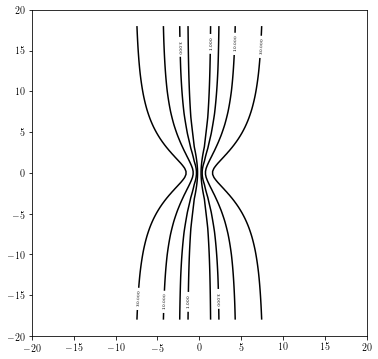

In [7]:
X, Z = np.meshgrid(xarray, zarray)
plt.figure(figsize=(5,5))
plt.figure(figsize=(6,6)) # default is (8,6)
# # plt.figure()
levels = [0.0, 1, 3, 10, 30]
# cp = plt.contour(X, Z, flux, levels,label=r'$\kappa=1/2$',linestyles='dotted')
cp1 = plt.contour(X, Z, flux1,levels,colors='k')

# plt.clabel(cp, inline=True, fontsize=8)
plt.clabel(cp1, inline=True, fontsize=5)


# # plt.annotate('my_label', (8, 1), backgroundcolor='w')

# # plt.colorbar(cp1)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.show()

In [8]:
print(r_c)

[ 85.90416633]


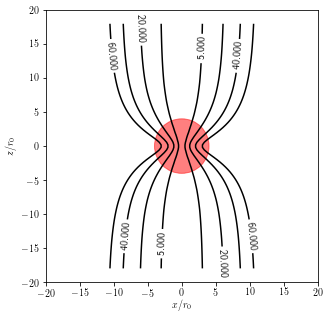

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, sharex='col', sharey='row',
                                                     figsize=(5,5))
ax.add_patch(plt.Circle((0, 0), rc, color='r', alpha=.5))
# ax.add_patch(plt.Circle((1, 1), 0.5, color='#00ffff', alpha=0.5))
# ax.add_artist(plt.Circle((1, 0), 0.5, color='#000033', alpha=0.5))
X, Z = np.meshgrid(xarray, zarray)
# plt.figure(figsize=(5,5))
# plt.figure(figsize=(6,6)) # default is (8,6)
# # plt.figure()
levels = [5, 20,40,60]
# cp = plt.contour(X, Z, flux, levels,label=r'$\kappa=1/2$',linestyles='dotted')
cp1 = plt.contour(X, Z, flux1,levels,colors='k')

# plt.clabel(cp, inline=True, fontsize=8)
ax.clabel(cp1, inline=True, fontsize=10)


#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='box-forced')
# ax.text(-14,11, r'$\kappa = %s $'%k2)
# ax.text(-14,9, r'$r_0 = 0.012 \,pc  $')
# ax.text(5,11, r'$n_0 = %5.1e \,cm^{-3}   $' %n_flat)
# ax.text(5,9, r'$n_c = %5.1e \,cm^{-3}   $'%nc)
# ax.text(-14,7, r'$r_c = 0.050 \,pc   $')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.xlabel(r'$x/r_0$ ')
plt.ylabel(r'$z/r_0$ ')
ax.plot()   #Causes an autoscale update.
plt.savefig("H_MM1_hourglass_theis.pdf",format='pdf',dpi=300)
plt.show()
plt.show()


In [10]:
print(A)

300
